In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('pima-indians-diabetes.csv', names = ['pregnant','plasma','pressure','thickness',
                                                       'insulin','bmi','pedigree','age','class'])
df.head(10)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df[['pregnant', 'class']]

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [19]:
df_data = df[['pregnant', 'class']]
df_group = df_data.groupby(['pregnant'], as_index=False)
df_group.mean().sort_values(by = 'pregnant', ascending = False)

,pregnant,class
16,17,1.000000
15,15,1.000000
14,14,1.000000
13,13,0.500000
12,12,0.444444
11,11,0.636364
10,10,0.416667
9,9,0.642857
8,8,0.578947
7,7,0.555556


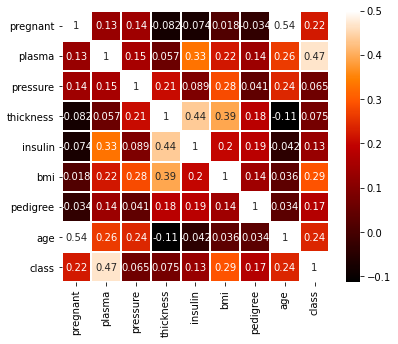

In [9]:
# 데이터 간의 상관관계를 그래프로 표현해 보기
colormap = plt.cm.gist_heat # 그래프의 색상 구성 정하기
plt.figure(figsize = (6, 5)) # 그래프의 크기 정하기

# 그래프의 속성을 결정. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시됨.
sns.heatmap(df.corr(), linewidths = 0.1, vmax = 0.5, cmap = colormap, linecolor = 'white', annot=True)
plt.show()

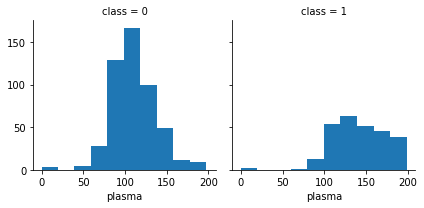

In [11]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins = 10)
plt.show()

In [34]:
# 딥러닝 구동 필요 케라스 함수
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# 필요한 라이브러리 불러오기
import numpy as np
import tensorflow as tf

# 실행할 때마다 같은 결과 출력하기 위해 설정
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 불러오기
df = pd.read_csv('pima-indians-diabetes.csv', 
                   names = ['pregnant','plasma','pressure','thickness','insulin','bmi','pedigree','age','class'])

train, test = train_test_split(df, test_size = 0.3)
train_arr = train.to_numpy()
test_arr = test.to_numpy()

X_train = train_arr[:, 0:8]
y_train = train_arr[:, 8]
X_test = test_arr[:,0:8]
y_test = test_arr[:,8]

# 모델 설정하기
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# 모델 컴파일하기
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델 실행하기
model.fit(X_train, y_train, epochs=200, batch_size=10)

# 결과 출력하기
print("\n Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/200
54/54 [==============================] - 0s 749us/step - loss: 13.8304 - accuracy: 0.6711
Epoch 2/200
54/54 [==============================] - 0s 718us/step - loss: 8.8063 - accuracy: 0.6356
Epoch 3/200
54/54 [==============================] - 0s 812us/step - loss: 5.5876 - accuracy: 0.6309
Epoch 4/200
54/54 [==============================] - 0s 819us/step - loss: 3.3894 - accuracy: 0.5071
Epoch 5/200
54/54 [==============================] - 0s 791us/step - loss: 2.2879 - accuracy: 0.5469
Epoch 6/200
54/54 [==============================] - 0s 814us/step - loss: 2.0169 - accuracy: 0.4710
Epoch 7/200
54/54 [==============================] - 0s 803us/step - loss: 1.0745 - accuracy: 0.5577
Epoch 8/200
54/54 [==============================] - 0s 903us/step - loss: 0.7644 - accuracy: 0.5755
Epoch 9/200
54/54 [==============================] - 0s 822us/step - loss: 0.7167 - accuracy: 0.5871
Epoch 10/200
54/54 [==============================] - 0s 847us/step - loss: 0.7301 - accur

Epoch 81/200
54/54 [==============================] - 0s 827us/step - loss: 0.5515 - accuracy: 0.6982
Epoch 82/200
54/54 [==============================] - 0s 785us/step - loss: 0.5187 - accuracy: 0.7469
Epoch 83/200
54/54 [==============================] - 0s 829us/step - loss: 0.5531 - accuracy: 0.6890
Epoch 84/200
54/54 [==============================] - 0s 809us/step - loss: 0.5592 - accuracy: 0.6995
Epoch 85/200
54/54 [==============================] - 0s 790us/step - loss: 0.5108 - accuracy: 0.7495
Epoch 86/200
54/54 [==============================] - 0s 776us/step - loss: 0.5238 - accuracy: 0.7457
Epoch 87/200
54/54 [==============================] - 0s 801us/step - loss: 0.5588 - accuracy: 0.7049
Epoch 88/200
54/54 [==============================] - 0s 778us/step - loss: 0.4873 - accuracy: 0.7731
Epoch 89/200
54/54 [==============================] - 0s 763us/step - loss: 0.4939 - accuracy: 0.7529
Epoch 90/200
54/54 [==============================] - 0s 774us/step - loss: 0.4699

54/54 [==============================] - 0s 807us/step - loss: 0.5015 - accuracy: 0.7422
Epoch 161/200
54/54 [==============================] - 0s 822us/step - loss: 0.4845 - accuracy: 0.7741
Epoch 162/200
54/54 [==============================] - 0s 854us/step - loss: 0.4881 - accuracy: 0.7591
Epoch 163/200
54/54 [==============================] - 0s 813us/step - loss: 0.4541 - accuracy: 0.7871
Epoch 164/200
54/54 [==============================] - 0s 808us/step - loss: 0.4756 - accuracy: 0.7777
Epoch 165/200
54/54 [==============================] - 0s 797us/step - loss: 0.4659 - accuracy: 0.7677
Epoch 166/200
54/54 [==============================] - 0s 803us/step - loss: 0.4661 - accuracy: 0.7538
Epoch 167/200
54/54 [==============================] - 0s 846us/step - loss: 0.4690 - accuracy: 0.7650
Epoch 168/200
54/54 [==============================] - 0s 824us/step - loss: 0.4917 - accuracy: 0.7607
Epoch 169/200
54/54 [==============================] - 0s 772us/step - loss: 0.4817 - a

In [18]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(3)
tf.random.set_seed(3)
df = pd.read_csv('pima-indians-diabetes.csv', names = ['pregnant','plasma','pressure','thickness','insulin','bmi','pedigree','age','class'])
train, test = train_test_split(df, test_size = 0.2)
train_arr = train.to_numpy()
test_arr = test.to_numpy()
X_train = train_arr[:,0:8]
y_train = train_arr[:,8]
X_test = test_arr[:,0:8]
y_test = test_arr[:,8]
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])
model.fit(X_train, y_train, epochs=200, batch_size=10)
print(model.evaluate(X_test,y_test)[1])

Epoch 1/200
62/62 [==============================] - 1s 768us/step - loss: 14.5766 - accuracy: 0.6415
Epoch 2/200
62/62 [==============================] - 0s 803us/step - loss: 8.0717 - accuracy: 0.6074
Epoch 3/200
62/62 [==============================] - 0s 792us/step - loss: 5.4674 - accuracy: 0.5150
Epoch 4/200
62/62 [==============================] - 0s 807us/step - loss: 3.3648 - accuracy: 0.5029
Epoch 5/200
62/62 [==============================] - 0s 793us/step - loss: 1.8048 - accuracy: 0.5206
Epoch 6/200
62/62 [==============================] - 0s 800us/step - loss: 1.1114 - accuracy: 0.5123
Epoch 7/200
62/62 [==============================] - 0s 837us/step - loss: 0.8038 - accuracy: 0.5800
Epoch 8/200
62/62 [==============================] - 0s 790us/step - loss: 0.9164 - accuracy: 0.5741
Epoch 9/200
62/62 [==============================] - 0s 817us/step - loss: 0.7432 - accuracy: 0.5542
Epoch 10/200
62/62 [==============================] - 0s 802us/step - loss: 0.7382 - accur

62/62 [==============================] - 0s 801us/step - loss: 0.5057 - accuracy: 0.7373
Epoch 82/200
62/62 [==============================] - 0s 801us/step - loss: 0.4951 - accuracy: 0.7595
Epoch 83/200
62/62 [==============================] - 0s 932us/step - loss: 0.4918 - accuracy: 0.7555
Epoch 84/200
62/62 [==============================] - 0s 752us/step - loss: 0.5010 - accuracy: 0.7371
Epoch 85/200
62/62 [==============================] - 0s 785us/step - loss: 0.5553 - accuracy: 0.7181
Epoch 86/200
62/62 [==============================] - 0s 883us/step - loss: 0.4793 - accuracy: 0.7751
Epoch 87/200
62/62 [==============================] - 0s 752us/step - loss: 0.5205 - accuracy: 0.7441
Epoch 88/200
62/62 [==============================] - 0s 753us/step - loss: 0.5121 - accuracy: 0.7438
Epoch 89/200
62/62 [==============================] - 0s 719us/step - loss: 0.5471 - accuracy: 0.7378
Epoch 90/200
62/62 [==============================] - 0s 736us/step - loss: 0.4987 - accuracy: 

62/62 [==============================] - 0s 815us/step - loss: 0.4848 - accuracy: 0.7774
Epoch 161/200
62/62 [==============================] - 0s 801us/step - loss: 0.4876 - accuracy: 0.7476
Epoch 162/200
62/62 [==============================] - 0s 768us/step - loss: 0.4568 - accuracy: 0.7883
Epoch 163/200
62/62 [==============================] - 0s 768us/step - loss: 0.4723 - accuracy: 0.7870
Epoch 164/200
62/62 [==============================] - 0s 768us/step - loss: 0.4632 - accuracy: 0.7898
Epoch 165/200
62/62 [==============================] - 0s 785us/step - loss: 0.4576 - accuracy: 0.7700
Epoch 166/200
62/62 [==============================] - 0s 736us/step - loss: 0.4542 - accuracy: 0.8009
Epoch 167/200
62/62 [==============================] - 0s 703us/step - loss: 0.4964 - accuracy: 0.7503
Epoch 168/200
62/62 [==============================] - 0s 785us/step - loss: 0.4793 - accuracy: 0.7662
Epoch 169/200
62/62 [==============================] - 0s 784us/step - loss: 0.4590 - a

In [36]:
X_test = test_arr[:, 0:8]
y_test = test_arr[:, 8]
score = model.evaluate(X_test, y_test, verbose = 1)
print(score)

8/8 [==============================] - 0s 859us/step - loss: 0.6589 - accuracy: 0.6797
[0.6588935256004333, 0.6796537041664124]


In [42]:
X_test = test_arr[:,0:8]
prediction = model.predict(X_test)
p = prediction[int(input('input number : '))]
print(f'환자의 생존률은 {p*100}%, 정확도는 : {score[1]*100}%')

input number : 2
환자의 생존률은 [21.57578]%, 정확도는 : 67.96537041664124%
